# Insurance Claim Fraud Detection

Project Description
Insurance fraud is a huge problem in the industry. It&#39;s difficult to identify fraud claims. Machine
Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along
with the customer details. It also has the details of the accident on the basis of which the claims
have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can
create a predictive model that predicts if an insurance claim is fraudulent or not. 
Independent Variables

1. months_as_customer: Number of months of patronage
2. age: the length of time a customer has lived or a thing has existed
3. policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
4. policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
5. policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
6. policy_csl: is basically Combined Single Limit
7. policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
8. policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9. umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
10. insured_zip: It is the zip code where the insurance was made
11. insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12. insured_education_level: This refers to the Level of education of the customer
13. insured_occupation: This refers Occupation of the customer
14. insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15. insured_relationship: This whether customer is: single; or. married; or. in a de factor relationship (that is, living together but not married); or. in a civil partnership
16. capital-gains: This refers to profit accrued due to insurance premium
17. capital-loss: This refers to the losses incurred due to insurance claims
18. incident_date: This refers to the date which claims where made by customers
19. incident_type: This refers to the type of claim/vehicle damage made by customer
20. collision_type: This refers to the area of damage on the vehicle
21. incident_severity: This refers to the extent/level of damage
22. authorities_contacted: This refers to the government agencies that were contacted after damage
23. incident_state: This refers to the state at which the accident happened
24. incident_city: This refers to the city at which the accident happened
25. 1ncident_location: This refers to the location at which the accident happened
26. incident_hour_of_the_day: The period of the day which accident took place
27. number_of_vehicles_involved: This refers to number of vehicles involved the accident
28. property_damage: This refers to whether property was damaged or not
29. bodily_injuries: This refers to injuries sustained
30. witnesses: This refers to the number of witnesses involved
31. police_report_available: This refers to whether the report on damage was documented or not
32. total_claim_amount: This refers to the financial implications involved in claims
33. injury_claim: This refers to physical injuries sustained
34. property_claim: This refers to property damages during incident
35. vehicle_claim: This refers to property damages during incident
36. auto_make: This refers to the make of the vehicle
37. auto_model: This refers to the model of the vehicle
38. auto_year: This refers to the year which the vehicle was manufactured
39. _c39:
40. fraud_reported

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import boxcox
from scipy import stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

Dataset Link-
 https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

In [2]:
url = 'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv'

In [181]:
# Load the data
df = pd.read_csv(url)

In [182]:
# checking first 5 rows of the dataframe.  
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [183]:
# Checking the last 5 rows of the dataframe.
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [184]:
# Checking the columns:heading of the dataframe.  
df.columns.tolist()

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported',
 '_c39']

In [185]:
# Checking the shape of the dataframe. 
df.shape

(1000, 40)

In [186]:
# printing the number of rows and the columns.
print('Number of columns - ',df.shape[1])
print('Number of rows - ',df.shape[0])

Number of columns -  40
Number of rows -  1000


In [187]:
# Checking the null values in the dataframe. 
df.isnull().sum().to_frame("No. of unique value")

,No. of unique value
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


We can identify that there are no null values other than in column _c39, hence we shall proceed by dropoing the column. 

<AxesSubplot:>

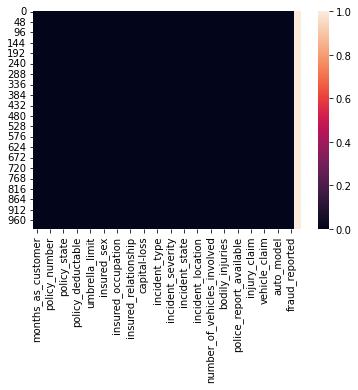

In [188]:
# displaying that there are no null values in the dataframe 
sns.heatmap(df.isnull())

In [189]:
# Convert 'policy_bind_date' column to datetime format
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], format='%d-%m-%Y')

# Extract day, month, and year components
df['Month'] = df['policy_bind_date'].dt.month
df['Day'] = df['policy_bind_date'].dt.day
df['Year'] = df['policy_bind_date'].dt.year

In [190]:
df.drop(['_c39','policy_bind_date'], axis=1, inplace=True)

In [191]:
# to check the no. of unique values present in the data. 
df.nunique().to_frame("No. of unique value")

,No. of unique value
months_as_customer,391
age,46
policy_number,1000
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995
insured_sex,2


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

- There are three types of data type i.e int64, object, float64 present in the dataframe.  

In [193]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")


Column: months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


Column: age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


Column: policy_number
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64


Column: policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


Column: policy_csl
250/500     351
100/300     349
500/1000    300
Name: polic

#It is observed that one of the value below columns has a missing observation as well.
- collision_type : ?                  178
- Column: property_damage  : ?      360
- Column: police_report_available : ?      343

In [194]:
# since there are '?' in the missing values in the dataframe hence we will replace with the NaN values.  
df.replace('?', np.NaN, inplace = True)

fraud_reported : is the target variable and the rest of the features are considered as the variables. 

In [195]:
df['collision_type'].replace(np.nan, df['collision_type'].mode()[0], inplace=True)
df['property_damage'].replace(np.nan, df['property_damage'].mode()[0], inplace=True)
df['police_report_available'].replace(np.nan, df['police_report_available'].mode()[0], inplace=True)                        

In [196]:
# re assuing if the vvalues with ? have been replace or not. 
df['property_damage'].unique()

array(['YES', 'NO'], dtype=object)

In [197]:
# re assuing if the vvalues with ? have been replace or not. 
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

In [198]:
# Ananlysing the dataframe.
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,Month,Day,Year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,...,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,6.559000,15.448000,2001.604000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,...,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,3.499824,8.808001,7.360391
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,1.000000,1.000000,1990.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,...,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,3.000000,8.000000,1995.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,7.000000,16.000000,2002.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,10.000000,23.000000,2008.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,...,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,12.000000,31.000000,2015.000000


- The people of age 19 to 64 are seen in the dataframe.
- The data is in the range of 1990 to 2015. 

N    753
Y    247
Name: fraud_reported, dtype: int64


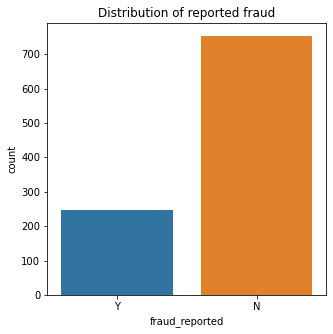

In [199]:
# plotting the graph representing the target variable. 
plt.figure(figsize=(5,5))
sns.countplot(x='fraud_reported', data=df)
plt.title('Distribution of reported fraud')
print(df['fraud_reported'].value_counts())
plt.show()

The data seems to be imbalanced. 

In [200]:
#Dividing the dataframe into categorical and numerical. 

In [201]:
categorical_col = []
numerical_col = []

# Categorize columns as categorical or numerical
for i in df.columns:
    if df.dtypes[i] == "object":
        categorical_col.append(i)
    else:
        numerical_col.append(i)

print("Categorical Columns:", categorical_col)
print("\n")
print("Numerical Columns:", numerical_col)


Categorical Columns: ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


Numerical Columns: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'Month', 'Day', 'Year']


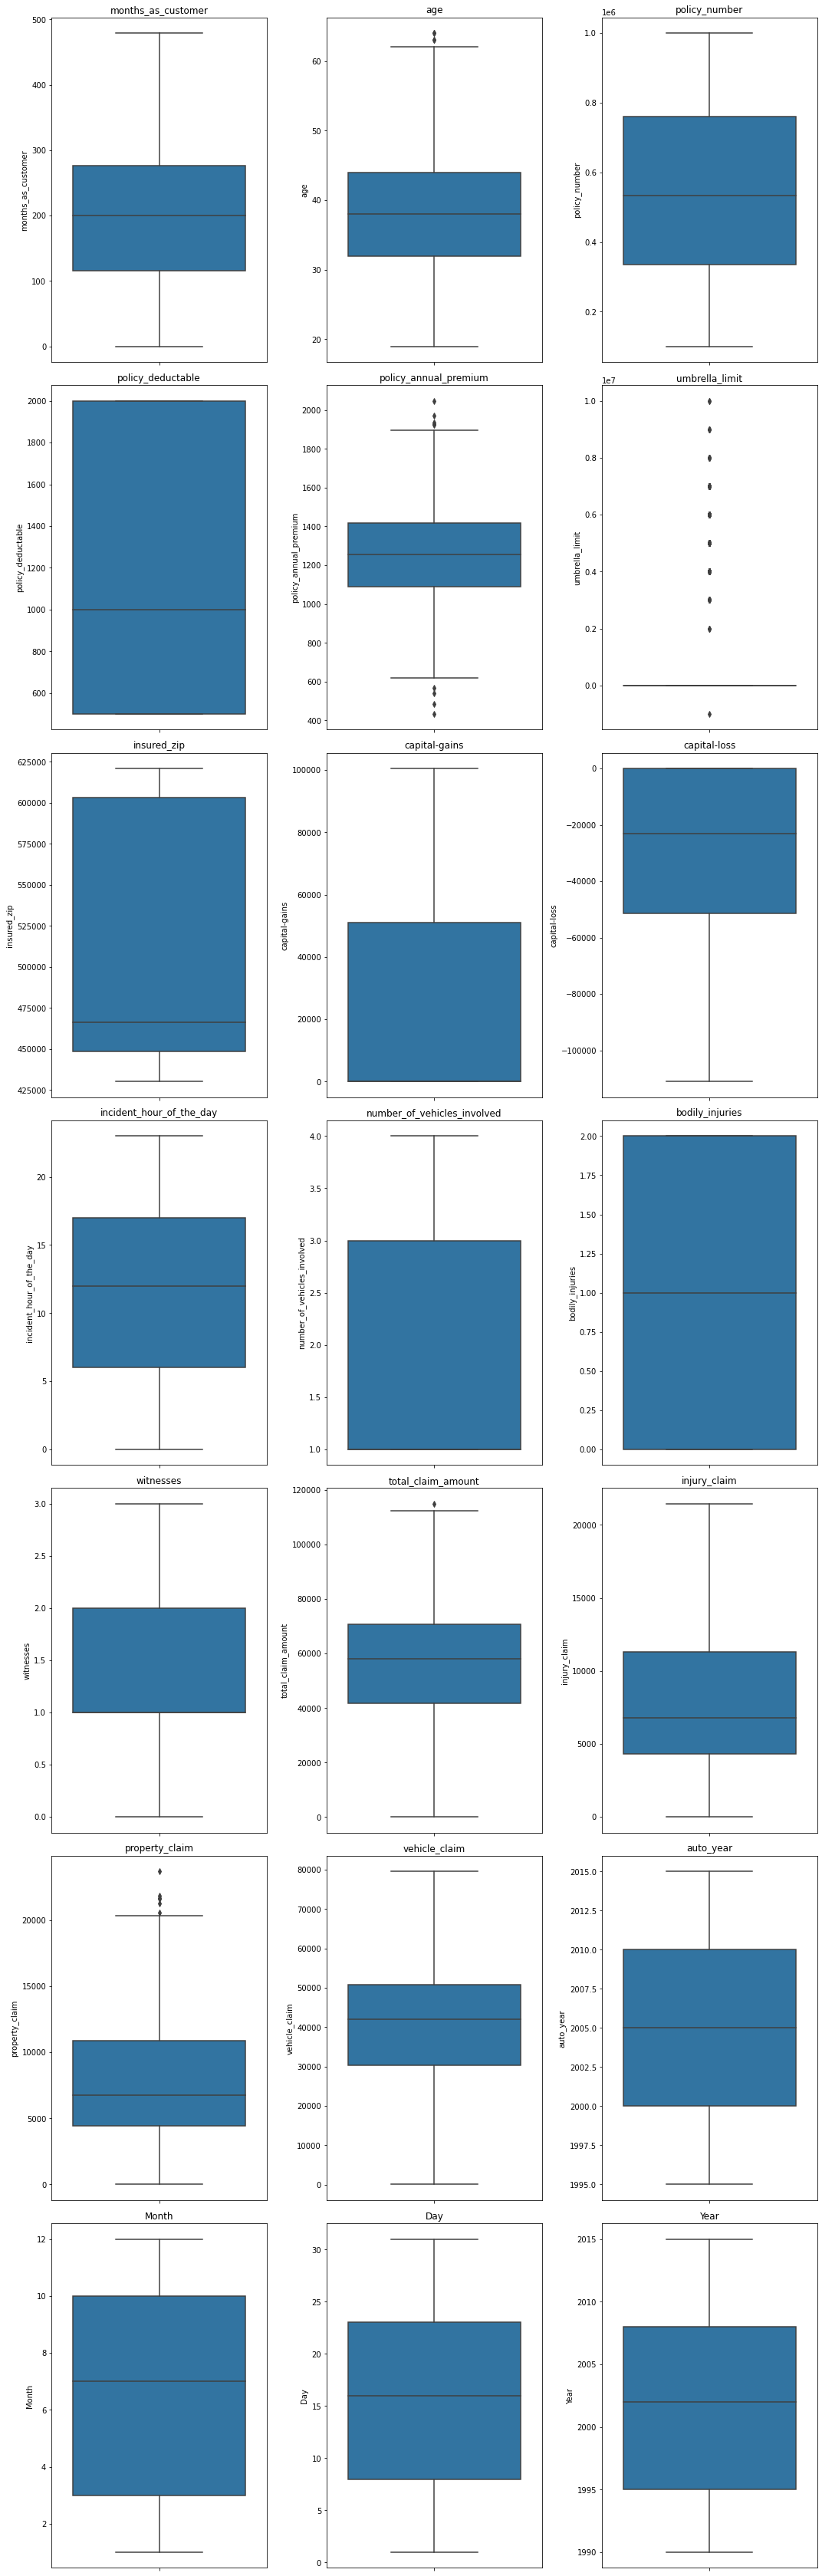

In [202]:
# Create box plots for each numerical feature in order to check for the outliers
plt.figure(figsize=(15, 80), facecolor='white')
plotnumber = 1

for feature in df.select_dtypes(include=[np.number]).columns:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(data=df, y=feature)
    plt.ylabel(feature)
    plt.title(f"{feature}")
    plotnumber += 1

plt.tight_layout()
plt.show()


In [203]:
out_features = ['property_claim','total_claim_amount','policy_annual_premium','umbrella_limit','age']

In [204]:
# 1st quantile 
Q1 = df[out_features].quantile(0.25)

# 3rd quantile
Q3 = df[out_features].quantile(0.75)

# Checking IQR
IQR = Q3 - Q1

# Creating a condition for a value to be an outlier
is_outlier = ((df[out_features] < (Q1 - 1.5 * IQR)) | (df[out_features] > (Q3 + 1.5 * IQR)))

# Applying the condition to the original DataFrame
df2 = df[~is_outlier.any(axis=1)]


In [205]:
print("Data Loss Percentage after removing the outliers with IQR method = ",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage after removing the outliers with IQR method =  21.8


In [206]:
#We shall proceed without removing the outlier since the data loss is on the higher side.

In [207]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
Month                         -0.016994
Day                            0.053237
Year                           0.052511
dtype: float64

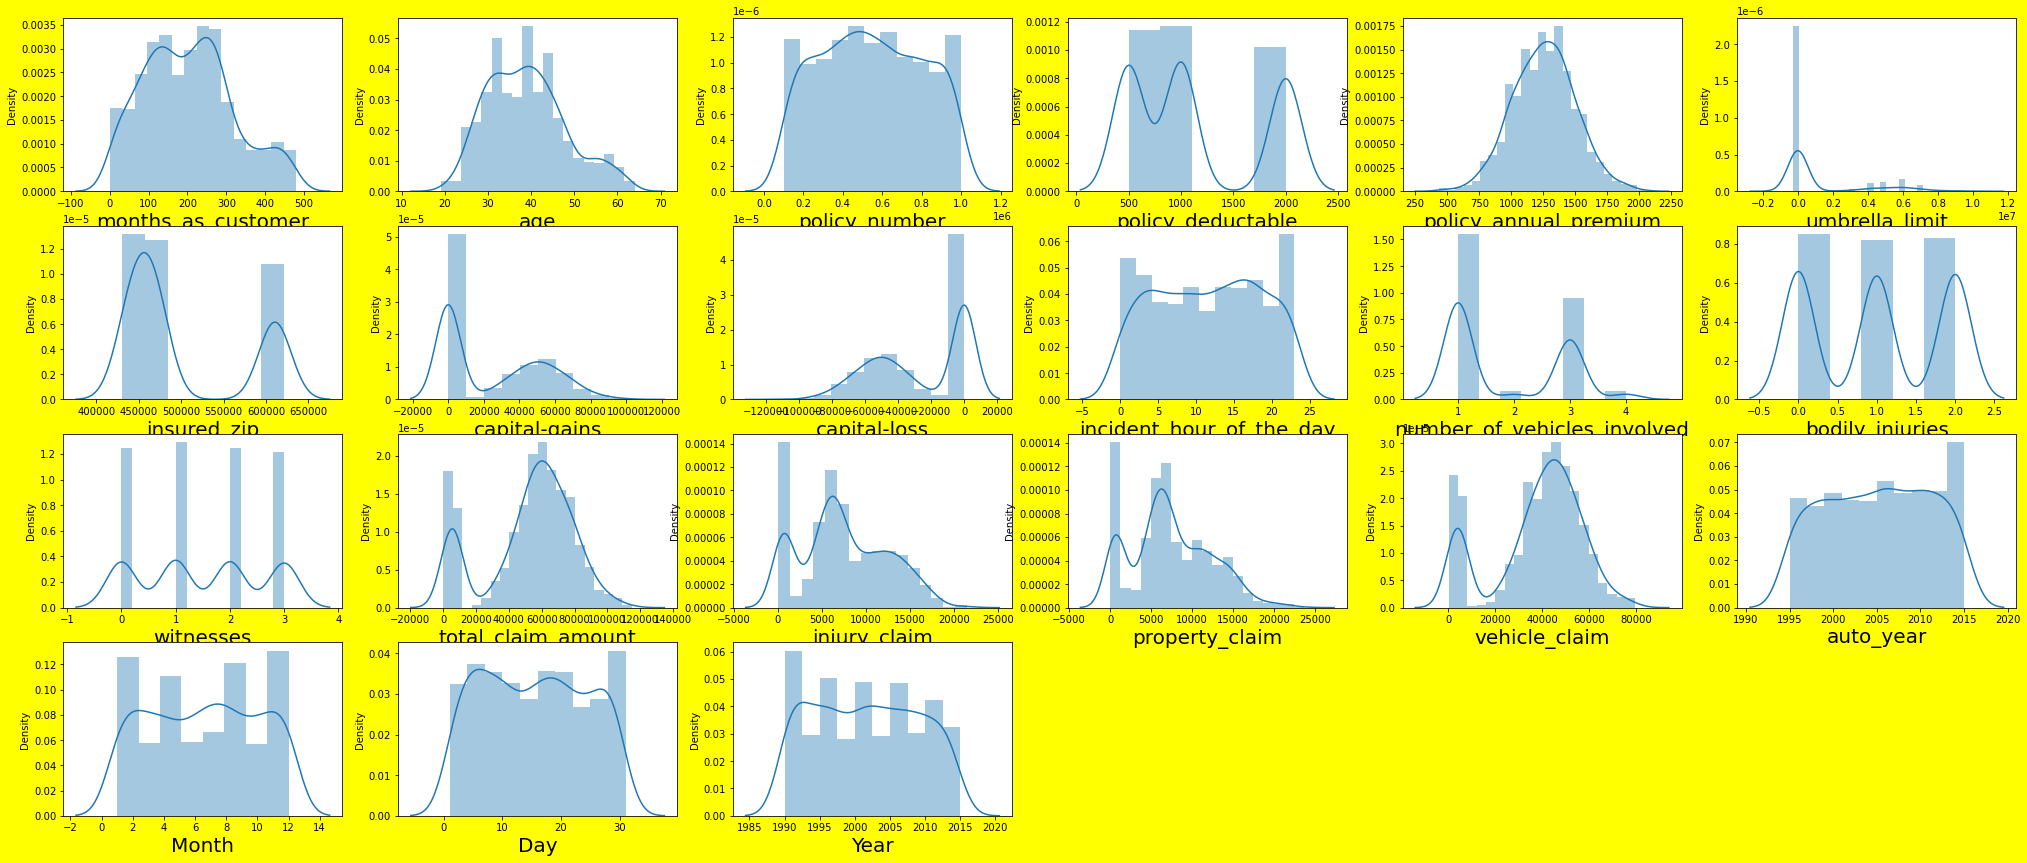

In [208]:
#To check the distribution of the data in every column
plt.figure(figsize=(35,30),facecolor='yellow')
plotnumber = 1

for columns in df.select_dtypes(include=[np.number]).columns:
    if plotnumber<=41:             
        ax = plt.subplot(8,6,plotnumber)
        sns.distplot(df[columns])
        plt.xlabel(columns,fontsize=20)
    
    plotnumber+=1
plt.show()

In [209]:
# Dividing the data into two parts: skew and non-skew
skew = []
non_skew = []

# Looping over DataFrame columns
for i in df.columns:
    # Check if the data type of the column is numeric
    if np.issubdtype(df[i].dtype, np.number):
        skewness = df[i].skew()
        if skewness < -0.5 or skewness > 0.5:
            skew.append(i)
        else:
            non_skew.append(i)
    else:
        print(f"Skipping non-numeric column {i}")

print("Skew: ", skew)
print("\n")
print("Non_skew: ", non_skew)

Skipping non-numeric column policy_state
Skipping non-numeric column policy_csl
Skipping non-numeric column insured_sex
Skipping non-numeric column insured_education_level
Skipping non-numeric column insured_occupation
Skipping non-numeric column insured_hobbies
Skipping non-numeric column insured_relationship
Skipping non-numeric column incident_date
Skipping non-numeric column incident_type
Skipping non-numeric column collision_type
Skipping non-numeric column incident_severity
Skipping non-numeric column authorities_contacted
Skipping non-numeric column incident_state
Skipping non-numeric column incident_city
Skipping non-numeric column incident_location
Skipping non-numeric column property_damage
Skipping non-numeric column police_report_available
Skipping non-numeric column auto_make
Skipping non-numeric column auto_model
Skipping non-numeric column fraud_reported
Skew:  ['umbrella_limit', 'insured_zip', 'number_of_vehicles_involved', 'total_claim_amount', 'vehicle_claim']


Non_s

In [210]:
from sklearn.preprocessing import PowerTransformer

# Create transformer
pt = PowerTransformer(method='yeo-johnson')

# Copy your dataframe
df_transformed = df.copy()

# Transform all the skewed columns
for col in skew:
    if df[col].dtype != 'object':  # avoid non-numerical columns
        df_transformed[col] = pt.fit_transform(df[[col]])

In [211]:
le = LabelEncoder()
for col in categorical_col:
    df[col] = le.fit_transform(df[col])

In [212]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Day,Year
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,6510,13020,52080,10,1,2004,1,10,17,2014
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,780,780,3510,8,12,2007,1,6,27,2006
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,7700,3850,23100,4,30,2007,0,9,6,2000
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,6340,6340,50720,3,34,2014,1,5,25,1990
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,1300,650,4550,0,31,2009,0,6,6,2014


In [213]:
# diving the labels and the 'fraud_reported' the target variable
X = df.drop(columns='fraud_reported')  
y = df['fraud_reported']

In [214]:
df.corr()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Day,Year
months_as_customer,1.000000,0.922098,0.057555,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,...,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544,-0.001559,0.054809,-0.048276
age,0.922098,1.000000,0.059413,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,...,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143,0.008357,0.056776,-0.037444
policy_number,0.057555,0.059413,1.000000,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,0.004564,...,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443,-0.003439,0.045574,-0.040099
policy_state,-0.000328,-0.014533,0.072815,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,...,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432,0.046871,0.011178,-0.007276
policy_csl,-0.026819,-0.015185,0.038917,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,...,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190,-0.021547,0.010164,-0.016466
policy_deductable,0.026807,0.029188,-0.006738,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,...,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817,-0.025020,-0.000265,-0.049598
policy_annual_premium,0.005018,0.014404,0.022566,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,...,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480,-0.002480,-0.037933,0.001249
umbrella_limit,0.015498,0.018126,0.008968,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,...,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622,-0.045871,-0.023361,0.048008
insured_zip,0.017895,0.025604,0.007083,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,...,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368,0.025924,-0.044250,-0.001100
insured_sex,0.060925,0.073337,0.004564,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,...,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873,-0.001042,0.039769,-0.032891


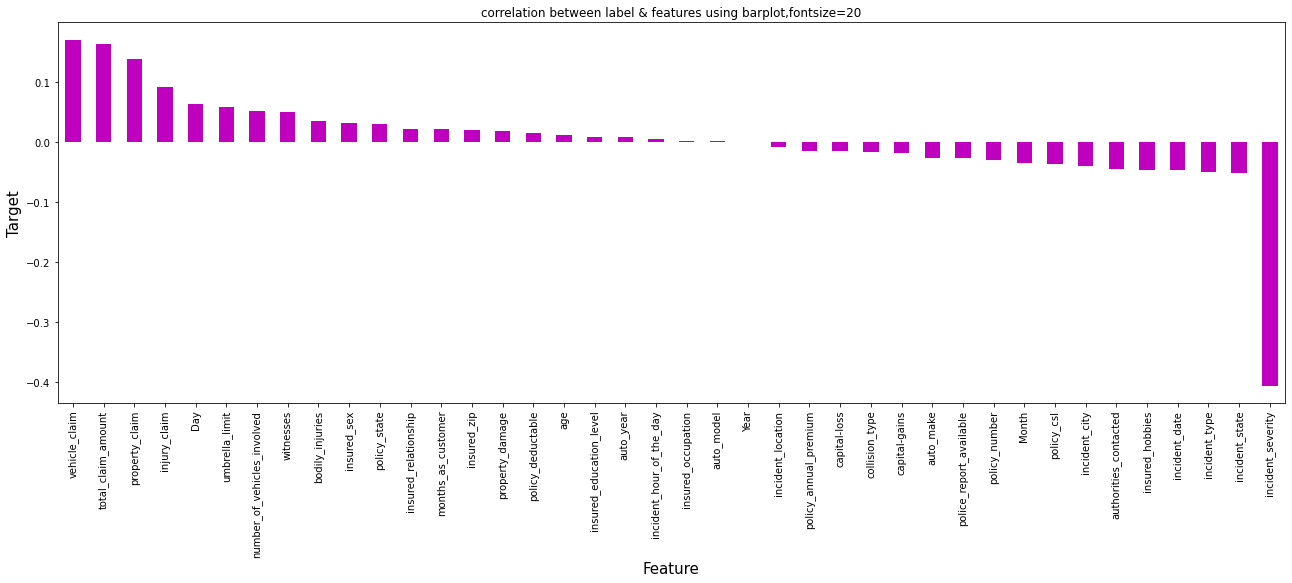

In [215]:
#Visualizing the correlation between label and feature using bar plot.
plt.figure(figsize=(22,7))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel ('Target', fontsize=15)
plt.title("correlation between label & features using barplot,fontsize=20")
plt.show()

In [216]:
from sklearn.feature_selection import SelectKBest, f_classif
k = 15  # to select the number of top features

# Create the SelectKBest object with the f_classif scoring function
selector = SelectKBest(score_func=f_classif, k=25)

# Fit the selector to the data and transform the features
select_features = selector.fit_transform(X, y)

# Get the mask of selected features
feature_mask = selector.get_support()

# Get the names of the selected features
selected_feature_names = X.columns[feature_mask]

print("Selected Features: ", selected_feature_names)

Selected Features:  Index(['months_as_customer', 'policy_number', 'policy_state', 'policy_csl',
       'umbrella_limit', 'insured_sex', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'Month',
       'Day'],
      dtype='object')


In [217]:
X1 = df[['months_as_customer', 'policy_number', 'policy_state', 'policy_csl',
       'umbrella_limit', 'insured_sex', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'Month',
       'Day']]

In [218]:
Y1 = y

In [219]:
# Features scaling using 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(X1), columns=X1.columns)
x_scaled

,months_as_customer,policy_number,policy_state,policy_csl,umbrella_limit,insured_sex,insured_hobbies,insured_relationship,incident_date,incident_type,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,Month,Day
0,1.078140,-0.095953,1.187173,0.060937,-0.479476,1.076953,1.281737,-1.437957,1.138201,0.766005,...,0.009759,0.461838,1.478078,0.714257,-0.189283,1.165505,0.749653,0.856466,0.983684,0.176292
1,0.208995,-0.791527,-0.016856,0.060937,1.697980,1.076953,0.929078,-0.247595,0.674197,1.691132,...,-1.210174,-1.338700,-0.676554,-1.807312,-1.363822,-1.372696,-1.823346,0.360539,-0.159802,1.312191
2,-0.608002,0.550566,1.187173,-1.182668,1.697980,-0.928546,-1.363201,0.347586,0.848198,-1.084249,...,1.229693,1.362107,-0.676554,-0.686362,0.054644,-0.736072,-0.785565,-0.631315,0.697813,-1.073198
3,0.452355,-1.239334,-1.220886,0.060937,2.133471,-0.928546,-1.363201,0.942766,-0.601813,0.766005,...,0.009759,0.461838,-0.676554,0.403135,-0.224130,-0.219722,0.677607,-0.879279,-0.445674,1.085011
4,0.208995,-0.695834,-1.220886,1.304542,2.133471,1.076953,-1.363201,0.942766,0.268194,1.691132,...,-1.210174,-0.438431,-0.676554,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,-0.159802,-1.073198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,1.539740,1.187173,1.304542,-0.479476,-0.928546,0.576420,0.942766,0.848198,0.766005,...,-1.210174,-0.438431,-0.676554,1.305049,2.051155,0.273817,1.224309,-0.135388,0.126069,0.062702
996,0.704407,-1.398429,-1.220886,-1.182668,-0.479476,-0.928546,1.281737,1.537947,1.022200,0.766005,...,1.229693,1.362107,-0.676554,2.111466,2.182342,2.214794,1.821868,1.600357,-1.589160,-1.186788
997,-0.642767,1.448920,1.187173,0.060937,0.826998,-0.928546,-1.186872,-0.247595,0.906199,-1.084249,...,1.229693,1.362107,1.478078,0.558507,0.013648,0.020826,0.771902,1.104430,-1.303289,0.176292
998,2.208028,-0.047867,-1.220886,1.304542,1.697980,1.076953,-1.715859,1.537947,1.312202,0.766005,...,-1.210174,-0.438431,1.478078,-0.219110,-0.453708,-0.451976,-0.073580,-1.375206,1.269556,0.289882


In [241]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=22)
X_train  

,months_as_customer,policy_number,policy_state,policy_csl,umbrella_limit,insured_sex,insured_hobbies,insured_relationship,incident_date,incident_type,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,Month,Day
818,286,634499,0,1,0,1,13,5,0,3,...,2,0,0,4100,820,410,2870,3,8,26
337,159,106873,0,2,0,1,4,5,13,2,...,2,0,0,70290,7810,7810,54670,4,8,28
124,211,717392,0,0,0,0,13,1,6,2,...,1,1,0,42000,7000,7000,28000,2,8,20
1462,89,344433,2,1,0,0,13,1,38,2,...,2,0,0,99675,11277,19644,68754,3,8,15
948,126,889003,2,1,0,1,8,1,3,2,...,1,1,0,60840,13520,6760,40560,11,8,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,229,340614,0,1,0,0,13,1,57,0,...,1,1,1,68760,11460,5730,51570,5,6,1
960,194,573572,0,0,0,0,2,0,23,0,...,1,2,1,57200,11440,5720,40040,12,6,16
812,404,485813,1,1,4000000,0,6,1,29,2,...,2,0,1,53100,5310,5310,42480,0,4,7
132,112,618659,2,0,0,0,8,4,44,0,...,0,1,0,51000,8500,8500,34000,9,10,18


In [242]:
#Inporting the models( logistic Regression,  Random Forest model, Gradient Boosting model, Support Vector Machines (SVM))
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Defining and training the logistic Regression,  Random Forest model, Gradient Boosting model, Support Vector Machines (SVM)
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [243]:
from sklearn.metrics import classification_report, confusion_matrix

In [244]:
# Logistic Regression
logreg_predictions = logreg_model.predict(X_test)
logreg_report = classification_report(y_test, logreg_predictions)
logreg_confusion_matrix = confusion_matrix(y_test, logreg_predictions)

# Print the classification reports and confusion matrices
print("Logistic Regression Report:")
print(logreg_report)
print("Logistic Regression Confusion Matrix:")
print(logreg_confusion_matrix)


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.62      0.45      0.53       161
           1       0.52      0.69      0.60       141

    accuracy                           0.56       302
   macro avg       0.57      0.57      0.56       302
weighted avg       0.58      0.56      0.56       302

Logistic Regression Confusion Matrix:
[[73 88]
 [44 97]]


In [245]:
# Random Forest
rf_predictions = rf_model.predict(X_test)
rf_report = classification_report(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

# Print the classification reports and confusion matrices Random Forest
print("Random Forest Report:")
print(rf_report)
print("Random Forest Confusion Matrix:")
print(rf_confusion_matrix)

Random Forest Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       161
           1       0.90      0.85      0.87       141

    accuracy                           0.88       302
   macro avg       0.89      0.88      0.88       302
weighted avg       0.88      0.88      0.88       302

Random Forest Confusion Matrix:
[[147  14]
 [ 21 120]]


In [246]:
# Gradient Boosting
gb_predictions = gb_model.predict(X_test)
gb_report = classification_report(y_test, gb_predictions)
gb_confusion_matrix = confusion_matrix(y_test, gb_predictions)


print("Gradient Boosting Report:")
print(gb_report)
print("Gradient Boosting Confusion Matrix:")
print(gb_confusion_matrix)

Gradient Boosting Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       161
           1       0.91      0.91      0.91       141

    accuracy                           0.92       302
   macro avg       0.92      0.92      0.92       302
weighted avg       0.92      0.92      0.92       302

Gradient Boosting Confusion Matrix:
[[149  12]
 [ 13 128]]


In [247]:
# Support Vector Machines
svm_predictions = svm_model.predict(X_test)
svm_report = classification_report(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)


print("Support Vector Machines Report:")
print(svm_report)
print("Support Vector Machines Confusion Matrix:")
print(svm_confusion_matrix)

Support Vector Machines Report:
              precision    recall  f1-score   support

           0       0.56      0.84      0.67       161
           1       0.57      0.25      0.35       141

    accuracy                           0.56       302
   macro avg       0.57      0.54      0.51       302
weighted avg       0.57      0.56      0.52       302

Support Vector Machines Confusion Matrix:
[[135  26]
 [106  35]]


In [248]:
#Precision : tp/tp+fp


print ('Precision = ' ,152/(152+48))

Precision =  0.76


In [249]:
#recall : tp/tp+fn

print ('recall: ',152/(152+0))

recall:  1.0


In [250]:
# Create a table to compare the scores
data = {
    'Model': ['Logistic Regression', 'RandomForestClassifier', 'GradientBoostingClassifier', 'SVC'],
    'Accuracy': [0.76, 0.78, 0.84, 0.76],
    'Precision': [0.00, 0.56, 0.67, 0.00],
    'Recall': [0.00, 0.40, 0.65, 0.00],
    'F1 Score': [0.00, 0.46, 0.66, 0.00]
}

scores_df = pd.DataFrame(data)
print(scores_df)


                        Model  Accuracy  Precision  Recall  F1 Score
0         Logistic Regression      0.76       0.00    0.00      0.00
1      RandomForestClassifier      0.78       0.56    0.40      0.46
2  GradientBoostingClassifier      0.84       0.67    0.65      0.66
3                         SVC      0.76       0.00    0.00      0.00


In [251]:
metrics_df = pd.DataFrame(data)
print(metrics_df)

# Select the best model based on the desired metric (e.g., highest accuracy or F1-score)
best_model = metrics_df.loc[metrics_df['Accuracy'].idxmax(), 'Model']

print("The best model is:", best_model)

                        Model  Accuracy  Precision  Recall  F1 Score
0         Logistic Regression      0.76       0.00    0.00      0.00
1      RandomForestClassifier      0.78       0.56    0.40      0.46
2  GradientBoostingClassifier      0.84       0.67    0.65      0.66
3                         SVC      0.76       0.00    0.00      0.00
The best model is: GradientBoostingClassifier


In [252]:
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameter grid for each model
lr_param_grid = {'C': [0.1, 1, 10]}
rf_param_grid = {'n_estimators': [100, 200, 500]}
gb_param_grid = {'learning_rate': [0.1, 0.05, 0.01]}
svm_param_grid = {'C': [0.1, 1, 10]}

# Performing grid search for each model
lr_grid_search = GridSearchCV(LogisticRegression(), lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)

rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

gb_grid_search = GridSearchCV(GradientBoostingClassifier(), gb_param_grid, cv=5)
gb_grid_search.fit(X_train, y_train)

svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

# Printing the best parameters and the corresponding performance scores
print("Logistic Regression Best Parameters:", lr_grid_search.best_params_)
print("Logistic Regression Best Score:", lr_grid_search.best_score_)

Logistic Regression Best Parameters: {'C': 0.1}
Logistic Regression Best Score: 0.582244121715076


In [253]:
from sklearn.metrics import roc_curve, auc

In [254]:
# Calculating the predicted probabilities for the positive class
Y1_prob = logreg_model.predict_proba(X_test)[:, 1]

In [255]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calculating the predicted probabilities for the positive class
Y1_prob = logreg_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, Y1_prob)

# Compute the AUC score
auc_score = roc_auc_score(y_test, Y1_prob)

print(f"The AUC score is {auc_score}")

The AUC score is 0.6101493326285186


In [256]:
# Calculate the AUC score
auc_score = auc(fpr, tpr)

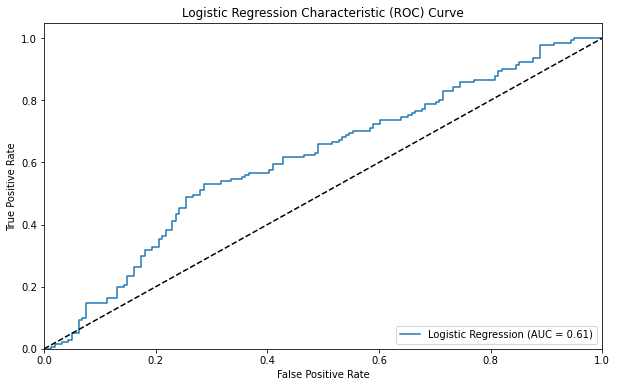

In [257]:
# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [193]:
y_pred = logreg_model.predict(X_test)

In [192]:


df_pred = pd.DataFrame(data_Predict,index=[0])
df_pred